<a href="https://colab.research.google.com/github/rafaart/DataScienceCO/blob/bootcamp/Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://www.bogotobogo.com/python/scikit-learn/images/Scikit-learn_logo.png)

# Scikit-learn

A **Scikit-learn** é uma biblioteca de machine learning em Python que oferece uma vasta gama de algoritmos, como regressão, classificação, clustering e redução de dimensionalidade, facilitando o desenvolvimento de modelos. Além disso, a **Scikit-learn integra-se perfeitamente com outras bibliotecas como NumPy e Pandas**, permitindo manipulação eficiente de dados.

O notebook a seguir mostra **algumas** funcionalidades do scikit-learn.

## Preparativos para execução deste notebook

In [ ]:
!gdown '1OpAY4_PffF4fSINf0wb55VBSLj-lV4k5'
!gdown '1IMNkTaDe_6X-7DI0jmQli02NEGwg0YZa'
import pandas as pd
from sklearn.datasets import load_iris

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

iris = load_iris()


Downloading...
From: https://drive.google.com/uc?id=1OpAY4_PffF4fSINf0wb55VBSLj-lV4k5
To: /content/train.csv
100% 135k/135k [00:00<00:00, 85.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1IMNkTaDe_6X-7DI0jmQli02NEGwg0YZa
To: /content/test.csv
100% 90.0k/90.0k [00:00<00:00, 86.3MB/s]


## Instalação


Para instalar a biblioteca Scikit-learn pelo pip, você pode usar o seguinte comando no terminal ou no prompt de comando:

```
pip install scikit-learn
```

In [ ]:
!pip install scikit-learn

## Importação

Você pode importar o pacote inteiro como você faz com as bibliotecas numpy e pandas
```
import sklearn
```

Entretanto, normalmente é mais eficiente importar apenas os módulos e funções que você precisa.

- Por exemplo, em:
```
from sklearn.neighbors import KNeighborsClassifier
```
você importa apenas a classe KNeighborsClassifier

- Por exemplo, em:
```
from sklearn import neighbors
```
você importa o módulo neighbors inteiro

- Por exemplo, em:
```
from sklearn.metrics import accuracy_score
```
você importa apenas a função `accuracy_score`


## Normalização e escala dos dados



O pré-processamento de dados com `StandardScaler` e `MinMaxScaler` no Scikit-learn é fundamental porque muitos algoritmos de machine learning são sensíveis à escala dos dados. Esses algoritmos, como regressão logística, SVM e redes neurais, podem ter um desempenho subótimo se os dados de entrada tiverem variáveis com escalas muito diferentes.

### StandardScaler

Transforma os dados para que tenham uma média de 0 e desvio padrão de 1. Isso é particularmente útil para algoritmos que assumem que os dados estão distribuídos normalmente ou que usam distância euclidiana como medida, como SVM ou regressão linear.

$
Standard Scaler = \frac{x_i-media(x)}{desvio(x)}
$

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train['x_scaled'] = scaler.fit_transform(train['x'].values.reshape(-1, 1))
train['y_scaled'] = scaler.fit_transform(train['y'].values.reshape(-1, 1))


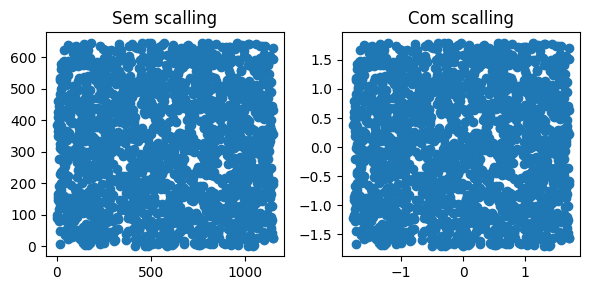

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(6, 3))

axs[0].scatter(train['x'], train['y'])
axs[0].set_title('Sem scalling')

axs[1].scatter(train['x_scaled'], train['y_scaled'])
axs[1].set_title('Com scalling')

plt.tight_layout()
plt.show()


### MinMaxScaler

Escala os dados para que eles estejam dentro de um intervalo específico, geralmente entre 0 e 1. Isso é importante quando você deseja preservar a forma original da distribuição dos dados, mas ainda assim ajustar as escalas.

$
MinMaxScaler = \frac{x_i-min(x)}{max(x)-min(x)}
$

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train['x_scaled'] = scaler.fit_transform(train['x'].values.reshape(-1, 1))
train['y_scaled'] = scaler.fit_transform(train['y'].values.reshape(-1, 1))


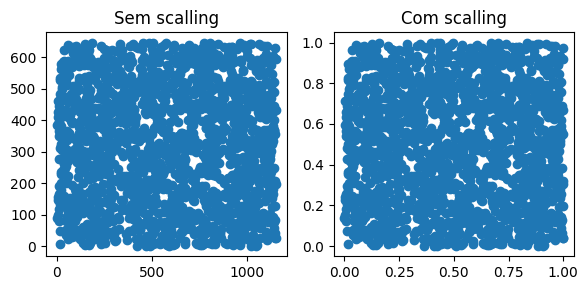

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(6, 3))

axs[0].scatter(train['x'], train['y'])
axs[0].set_title('Sem scalling')

axs[1].scatter(train['x_scaled'], train['y_scaled'])
axs[1].set_title('Com scalling')

plt.tight_layout()
plt.show()


## Identificação de Outliers

O uso de técnicas como `IsolationForest` e `EllipticEnvelope` para detectar e tratar outliers é essencial em diversas situações de machine learning e análise de dados, pois outliers podem distorcer significativamente os resultados dos modelos e análises.

![](https://www.researchgate.net/publication/319652397/figure/fig1/AS:963459470618649@1606718046270/Example-showing-a-hidden-outlier.gif)

### IsolationForest

É eficiente para grandes conjuntos de dados e é menos sensível à dimensionalidade dos dados, sendo adequado para detectar outliers em dados de alta dimensão. Ele pode identificar outliers em dados complexos onde os outliers não seguem uma distribuição simples.

In [ ]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.05)  # Ajuste a contaminação conforme necessário
model.fit(iris.data)


predictions = model.predict(iris.data) # Obtenha as previsões (-1 para outliers, 1 para inliers)



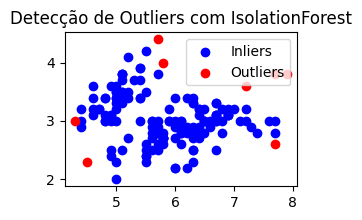

In [ ]:
# Plota os resultados
plt.figure(figsize=(3, 2))
plt.scatter(iris.data[predictions == 1, 0], iris.data[predictions == 1, 1], c='blue', label='Inliers')
plt.scatter(iris.data[predictions == -1, 0], iris.data[predictions == -1, 1], c='red', label='Outliers')
plt.title('Detecção de Outliers com IsolationForest')
plt.legend()
plt.show()



### EllipticEnvelope

É ideal para detectar outliers em dados que seguem uma distribuição normal multivariada. Isso é útil em situações onde os dados têm uma distribuição conhecida e você deseja identificar pontos que desviam significativamente desse padrão.

In [ ]:
from sklearn.covariance import EllipticEnvelope

model = EllipticEnvelope()
model.fit(iris.data)
predictions = model.predict(iris.data) # Obtém as previsões (1 para inlier, -1 para outlier)

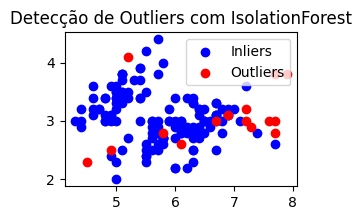

In [ ]:
# Plota os resultados
plt.figure(figsize=(3, 2))
plt.scatter(iris.data[predictions == 1, 0], iris.data[predictions == 1, 1], c='blue', label='Inliers')
plt.scatter(iris.data[predictions == -1, 0], iris.data[predictions == -1, 1], c='red', label='Outliers')
plt.title('Detecção de Outliers com IsolationForest')
plt.legend()
plt.show()



## Tratamento de dados ausentes

A imputação de dados ausentes é uma etapa crucial na preparação de dados, pois a presença de valores faltantes pode impactar negativamente a performance e a precisão dos modelos de machine learning. As técnicas `SimpleImputer`, `KNNImputer` e `IterativeImputer` são utilizadas para lidar com esses dados ausentes, cada uma com suas próprias abordagens e vantagens.

### SimpleImputer

É uma abordagem rápida e fácil de implementar. É eficaz quando os dados seguem um padrão simples e os valores ausentes são relativamente poucos. No entanto, pode não capturar complexidades mais sutis nos dados.

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer

# Introduzindo dados faltantes aleatoriamente (5%)
iris_missing = iris.data.copy()
rng = np.random.RandomState(0)
missing_mask = rng.rand(*iris_missing.shape) < 0.05
iris_missing[missing_mask] = np.nan

# Imputação com SimpleImputer (usando a média)
imputer = SimpleImputer(strategy='mean')
iris_imputed = imputer.fit_transform(iris_missing)


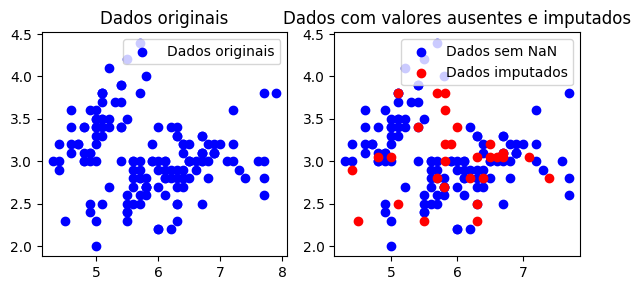

In [ ]:
# Plota os resultados
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.scatter(iris.data[:, 0], iris.data[:, 1], c='blue', label='Dados originais')
plt.title('Dados originais')
plt.legend()

plt.subplot(1, 2, 2)
not_nan_indices = ~np.isnan(iris_missing).any(axis=1)
plt.scatter(iris_missing[not_nan_indices, 0], iris_missing[not_nan_indices, 1], c='blue', label='Dados sem NaN')
nan_indices = np.isnan(iris_missing).any(axis=1)
plt.scatter(iris_imputed[nan_indices, 0], iris_imputed[nan_indices, 1], c='red', label='Dados imputados')
plt.title('Dados com valores ausentes e imputados')
plt.legend()

plt.tight_layout()
plt.show()


### KNNImputer

É útil quando há correlação entre variáveis e os dados ausentes são comuns em observações que são semelhantes entre si. O KNNImputer pode capturar padrões locais nos dados, oferecendo uma imputação mais refinada em comparação com métodos mais simples.

In [ ]:
import numpy as np
from sklearn.impute import KNNImputer

# Introduzindo dados faltantes aleatoriamente (5%)
iris_missing = iris.data.copy()
rng = np.random.RandomState(0)
missing_mask = rng.rand(*iris_missing.shape) < 0.05
iris_missing[missing_mask] = np.nan

imputer = KNNImputer()
iris_imputed = imputer.fit_transform(iris_missing)

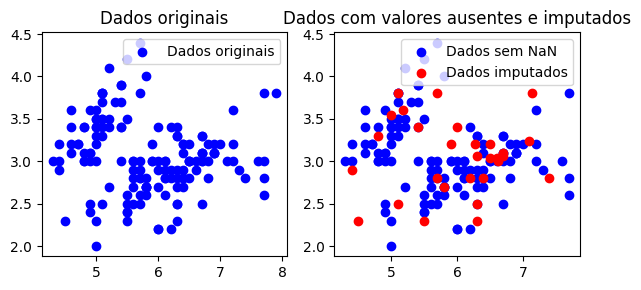

In [ ]:
# Plota os resultados
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.scatter(iris.data[:, 0], iris.data[:, 1], c='blue', label='Dados originais')
plt.title('Dados originais')
plt.legend()

plt.subplot(1, 2, 2)
not_nan_indices = ~np.isnan(iris_missing).any(axis=1)
plt.scatter(iris_missing[not_nan_indices, 0], iris_missing[not_nan_indices, 1], c='blue', label='Dados sem NaN')
nan_indices = np.isnan(iris_missing).any(axis=1)
plt.scatter(iris_imputed[nan_indices, 0], iris_imputed[nan_indices, 1], c='red', label='Dados imputados')
plt.title('Dados com valores ausentes e imputados')
plt.legend()

plt.tight_layout()
plt.show()


É uma abordagem mais sofisticada que pode capturar interações complexas entre variáveis. O IterativeImputer é útil quando a imputação precisa levar em conta múltiplas variáveis simultaneamente e quando os dados possuem uma estrutura mais complexa.

## Divisão do Dataset em Conjuntos de Treino, Validação e Teste

A divisão do dataset em conjuntos de treino, validação e teste é uma prática fundamental no desenvolvimento e avaliação de modelos de machine learning. Cada conjunto serve a um propósito específico e contribui para a construção de modelos robustos e generalizáveis.
- **Conjunto de treino**: Ele permite que o modelo se ajuste e se "treine" em relação aos dados. A qualidade e a quantidade do conjunto de treino são cruciais para o desempenho do modelo.
- **Conjunto de validação**: o usar dados que o modelo ainda não viu, o conjunto de validação ajuda a garantir que o modelo não esteja apenas decorando os dados de treino (overfitting). Ele fornece uma estimativa mais realista de como o modelo pode se comportar em dados novos.
- **Conjunto de teste**: Ele fornece uma avaliação imparcial e definitiva de como o modelo se comporta em dados novos. Através do conjunto de teste, você pode verificar a capacidade de generalização do modelo e estimar seu desempenho no mundo real.

In [ ]:
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)


Tamanho do conjunto de treino: (120, 4)
Tamanho do conjunto de teste: (30, 4)


## Alguns classificadores

### K-Nearest Neighbors (KNN)

O K-Nearest Neighbors é um algoritmo de aprendizado de máquina usado para tarefas de classificação e regressão. Ele funciona comparando a entrada de dados com os dados de treinamento e atribuindo a classe ou valor com base nos k vizinhos mais próximos no espaço de características. A decisão final é determinada por votação (para classificação) ou média (para regressão) dos vizinhos mais próximos. O KNN é simples e eficaz, mas pode ser computacionalmente caro para grandes conjuntos de dados.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train[['x','y']], train[['petroleo']])
y_pred = knn.predict(test[['x','y']])

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


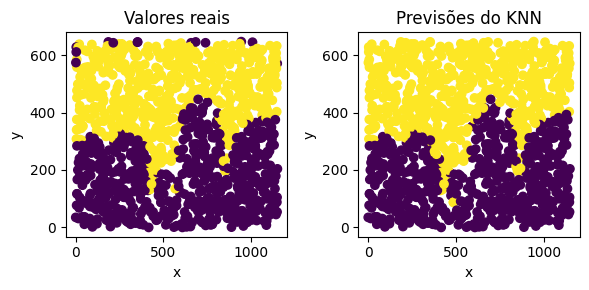

In [ ]:
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.scatter(test['x'], test['y'], c=test['petroleo'], cmap='viridis')
plt.title('Valores reais')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 2, 2)
plt.scatter(test['x'], test['y'], c=y_pred, cmap='viridis')
plt.title('Previsões do KNN')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()


### Árvore de Decisão

Uma Árvore de Decisão é um modelo de aprendizado de máquina que toma decisões baseadas em uma série de perguntas binárias sobre os dados. Cada nó da árvore representa uma decisão ou teste sobre uma característica, e cada ramificação representa o resultado do teste. Os nós finais (folhas) fornecem a classificação ou valor predito. Esse modelo é intuitivo e fácil de interpretar, mas pode ser propenso a sobreajuste se não for podado corretamente.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Inicializando o classificador
tree_clf = DecisionTreeClassifier()

# Treinando o modelo
tree_clf.fit(train[['x','y']], train[['petroleo']])

# Fazendo previsões
predictions = tree_clf.predict(test[['x','y']])

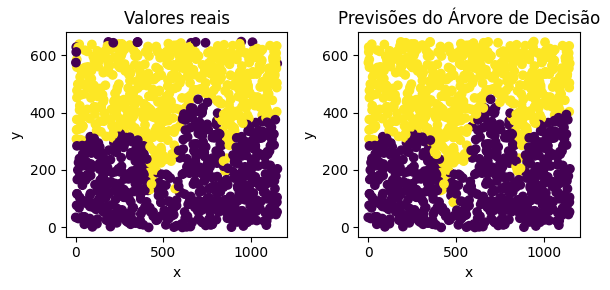

In [ ]:
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.scatter(test['x'], test['y'], c=test['petroleo'], cmap='viridis')
plt.title('Valores reais')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 2, 2)
plt.scatter(test['x'], test['y'], c=y_pred, cmap='viridis')
plt.title('Previsões do Árvore de Decisão')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()


### Regressão Logística

A Regressão Logística é um algoritmo de classificação usado para prever a probabilidade de uma classe ou evento. Apesar do nome, é usado para problemas de classificação binária e multiclasse. Ele estima a probabilidade de uma classe aplicando uma função logística (ou sigmoide) à combinação linear das características de entrada. O resultado é uma probabilidade entre 0 e 1, que é convertida em uma previsão de classe. A Regressão Logística é eficiente e amplamente utilizada em problemas de classificação binária.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Inicializando o classificador
log_reg = LogisticRegression()

# Treinando o modelo
log_reg.fit(train[['x','y']], train[['petroleo']])

# Fazendo previsões
predictions_regression = log_reg.predict(test[['x','y']])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


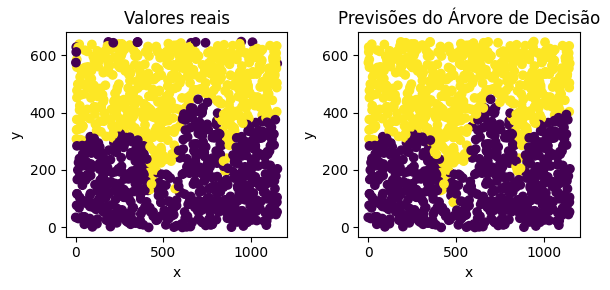

In [ ]:
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.scatter(test['x'], test['y'], c=test['petroleo'], cmap='viridis')
plt.title('Valores reais')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 2, 2)
plt.scatter(test['x'], test['y'], c=y_pred, cmap='viridis')
plt.title('Previsões do Árvore de Decisão')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()


## Avaliação de desempenho

No Scikit-learn, a avaliação do desempenho do modelo é realizada por meio de diversas classes e funções que medem a eficácia do modelo em termos de precisão, recall, F1-score, AUC-ROC, entre outros.

### `accuracy_score`

Mede a acurácia do modelo, que é a proporção de previsões corretas em relação ao total de previsões.

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test['petroleo'], y_pred)
accuracy

0.9683333333333334

### `precision_score`

Mede a precisão, que é a proporção de verdadeiros positivos entre todas as previsões positivas.

In [ ]:
from sklearn.metrics import precision_score

precision = precision_score(test['petroleo'], y_pred) # Usando micro porque tem mais de uma classe target
precision

0.9469320066334992

### `recall_score`

Mede o recall, que é a proporção de verdadeiros positivos entre todos os casos positivos reais.

In [ ]:
from sklearn.metrics import recall_score

recall = recall_score(test['petroleo'], y_pred)
recall

0.9896013864818024

### `f1_score`

Calcula o F1-score, que é a média harmônica da precisão e do recall.

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(test['petroleo'], y_pred)
f1

0.9677966101694916

### `roc_auc_score`

Mede a AUC-ROC (Área sob a Curva Receiver Operating Characteristic), que é uma métrica de performance para classificadores binários, representando a capacidade do modelo em distinguir entre classes.

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(test['petroleo'], predictions, multi_class='ovr')
roc_auc

0.975893743862509

### `confusion_matrix`

Gera a matriz de confusão, que mostra o número de verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos.

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test['petroleo'], predictions)
conf_matrix

array([[607,  16],
       [ 13, 564]])